In [70]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import sys
import pylab as pl
import re
import urllib as request
from datetime import datetime
from bs4 import BeautifulSoup
import seaborn as sns
import sklearn 
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.read_csv("zip_code_040114 (1).csv")

In [5]:
dfnonzero = df[df["median_listing_sqft"]!=0]

In [11]:
dfdropnan = dfnonzero.dropna()

In [60]:
dfdropnan['subway_station_density'] = np.log(dfdropnan['count_vals_density'])
dfdropnan['subway_stations'] = dfdropnan['count_vals']

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [61]:
max(dfdropnan['commuter_density'])

0.96033004189050453

In [62]:
Y = dfdropnan['median_listing_sqft']
dfdropnan['population_density'] = dfdropnan['population']/dfdropnan['area']

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [63]:
dfdropnan['commuter_density'] = dfdropnan['commuters']/dfdropnan['workers']

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
X = dfdropnan[['population_density','commuter_density','subway_station_density','subway_stations']]

In [65]:
Xt = sm.add_constant(X)
res=sm.OLS(Y,Xt).fit(intercept=True)
print res.summary()

                             OLS Regression Results                            
Dep. Variable:     median_listing_sqft   R-squared:                       0.577
Model:                             OLS   Adj. R-squared:                  0.556
Method:                  Least Squares   F-statistic:                     27.33
Date:                 Wed, 08 Mar 2017   Prob (F-statistic):           2.62e-14
Time:                         14:30:17   Log-Likelihood:                -639.98
No. Observations:                   85   AIC:                             1290.
Df Residuals:                       80   BIC:                             1302.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const             

In [66]:
Xt = sm.add_constant(dfdropnan['subway_stations'])
res=sm.OLS(Y,Xt).fit(intercept=True)
print res.summary()

                             OLS Regression Results                            
Dep. Variable:     median_listing_sqft   R-squared:                       0.056
Model:                             OLS   Adj. R-squared:                  0.044
Method:                  Least Squares   F-statistic:                     4.881
Date:                 Wed, 08 Mar 2017   Prob (F-statistic):             0.0299
Time:                         14:31:08   Log-Likelihood:                -674.16
No. Observations:                   85   AIC:                             1352.
Df Residuals:                       83   BIC:                             1357.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             638.2365    13

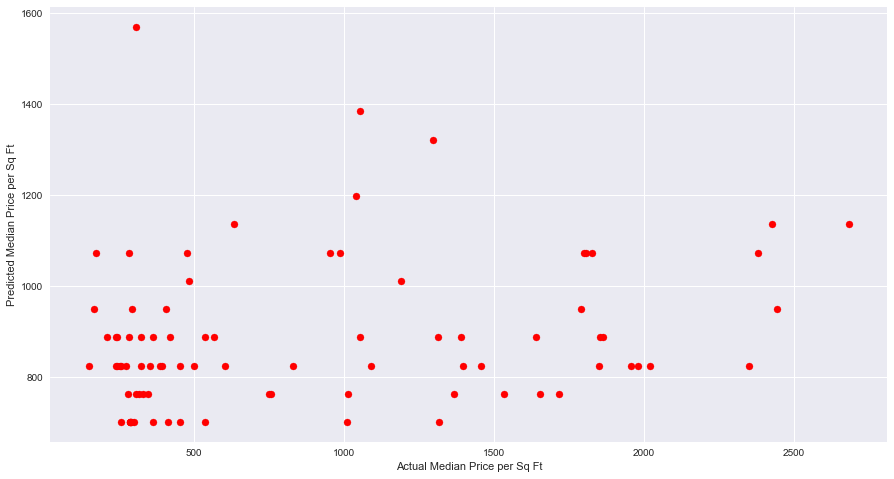

In [75]:
liregr = linear_model.LinearRegression()
liregr.fit(Xt, Y)
ols_prediction = liregr.predict(Xt)
plt.figure(figsize=(15,8))
plt.scatter(Y,liregr.predict(Xt),color='red')
plt.xlabel('Actual Median Price per Sq Ft')
plt.ylabel('Predicted Median Price per Sq Ft')

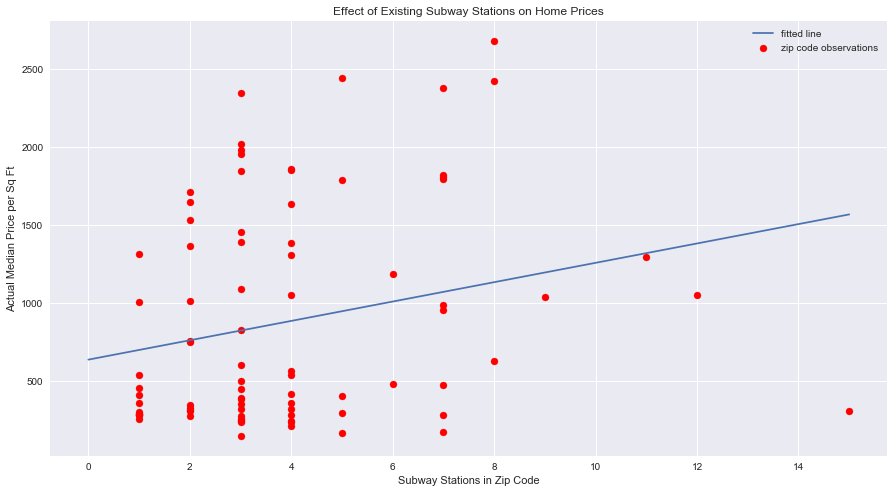

In [100]:
plt.figure(figsize=(15,8))
plt.scatter(dfdropnan['subway_stations'],Y,color='red',label="zip code observations")
plt.xlabel('Subway Stations in Zip Code')
plt.ylabel('Actual Median Price per Sq Ft')
plt.title('Effect of Existing Subway Stations on Home Prices')
xRange = np.arange(0,16,1)
XRangeT = sm.add_constant(xRange)
expectedYs = liregr.predict(XRangeT)
plt.plot(xRange,expectedYs, label = 'fitted line')
plt.legend()